In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


[Kaggle](https://www.kaggle.com/code/teampycaret/house-prices-prediction-using-pycaret/notebook)  
[Github](https://github.com/pycaret/pycaret/blob/master/examples/PyCaret_2_HousePrice_Regresion.ipynb)


# **1. PyCaret 설치하기**

**PyCaret이란?**
- AutoML을 하게 해주는 scikit-learn 패키지 기반 라이브러리 
- 단순한 코드 몇 줄로 머신러닝 모델을 쉽게 구현할 수 있음
- 분류(Classification), 회귀(Regression), 군집화(Clustering), 이상 탐지 (Anomaly detection) 등 다양한 모델 지원

In [2]:
!pip install pycaret==2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# 버전 확인하기
from pycaret.utils import version
version()

2.0


In [4]:
from pycaret.regression import *

# **2. 데이터 준비하기**

In [5]:
import pandas as pd

In [6]:
train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Euron 3기_DS/data/Week7/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Euron 3기_DS/data/Week7/test.csv')

In [7]:
print(train.shape, test.shape)

(1460, 81) (1459, 80)


In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# **📌 전체적인 진행 단계 요약**  
- 각 iteration마다  
1. Setup: pycaret의 환경을 초기화하고 변환 파이프라인을 생성하여 모델링 및 배포를 위한 데이터를 준비
2. 모델 비교
3. 다양하게 여러 변수들을 변경해가며 모델 생성/ 저장
4. 모델 blending
5. 모델 Stacking



# **3. Iteration 1: 전처리 ❌**

**🥕 setup(train, target = , session_id, silent = True)**  
- pycaret의 환경을 초기화하고 변환 파이프라인을 생성하여 모델링 및 배포를 위한 데이터를 준비하는 함수
- pycaret에서 다른 기능을 실행하기 전에 가장 먼저 호출되어야 함
- Parameters  
  **필수**  
  1) train DataFrame(array-like, sparse matrix)    
  2) 대상 feature의 이름(target)

  **옵션**  
  3) session_id  
     - Random seed를 설정해주는 부분
     - 난수 생성에 측정한 seed 값을 적용하여 랜덤하게 일을 처리
     - 이후 반복 실행 시에도 동일한 결과가 나올 수 있도록 함  

  4) silent = True
     - setup 시 중간에 feature의 속성을 확인하고 엔터를 쳐주어야 하는데, 이를 자동으로 넘겨준다.(무인 진행)

In [10]:
reg1 = setup(train, target = 'SalePrice', session_id = 123, silent = True) 

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1460, 81)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,59
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 0
INFO:logs:setup() succesfully completed......................................


In [11]:
models() # 모델 확인, setup을 한 후에만 가능

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


### **3-1. 모델 비교하기**






**🥕 compare_models( )**
- models( )에서 제공하는 모델들이나 scikit-learn에서 제공하는 모델을 별도로 선언한 이후에 입력한 모델들의 성능  
(MAE, MSE, RMSE, R^2, Train Time 등)을 DataFrame의 형태로 제공

In [12]:
compare_models(blacklist = ['tr']) # 긴 훈련 시간 문제로 Thielsen Regressor 제외

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,16145.2776,821859583.7718,27867.5094,0.8796,0.1319,0.0938,7.1064
1,Gradient Boosting Regressor,18236.4930,863600804.9997,28849.3494,0.8710,0.1435,0.1066,0.9898
2,Light Gradient Boosting Machine,18258.2733,962626448.2246,30280.4759,0.8584,0.1512,0.1079,0.2474
3,Extreme Gradient Boosting,19153.4409,1077063057.1607,31513.5491,0.8435,0.1544,0.1118,2.1688
4,Random Forest,19620.1525,1133756679.4507,32758.8866,0.8337,0.1605,0.1163,2.3448
5,Lasso Least Angle Regression,17371.6700,1353904392.2726,34426.4833,0.7938,0.1957,0.1027,0.2309
6,AdaBoost Regressor,26380.8014,1415872705.9908,36956.8857,0.7894,0.2101,0.1726,0.7393
7,Orthogonal Matching Pursuit,18555.7396,1474523803.2852,35486.2184,0.7718,0.1638,0.1094,0.0820
8,Ridge Regression,20237.8649,1505845359.8041,36412.6752,0.7713,0.1900,0.1233,0.0713
9,Extra Trees Regressor,22749.3972,1587696350.7454,38868.2769,0.7611,0.1845,0.1329,2.5043


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:<catboost.core.CatBoostRegressor object at 0x7f7c38b0be50>
INFO:logs:compare_models() succesfully completed......................................


### **3-2. 모델 생성/ 저장**



**🥕 create_model( )**
- 여러 모델이 아닌 하나의 모델에 대해서 setup( )에서 설정한 대로 학습을 진행하고, 학습의 결과를 학인할 수 있음
- 세부적으로 각 fold에 대한 성능을 제시함


In [13]:
catboost = create_model('catboost', verbose = False) 
gbr = create_model('gbr', verbose = False)
xgboost = create_model('xgboost', verbose = False)

# verbose: 함수 수행 시 발생하는 상세한 정보들을 표준 출력으로 자세히 내보낼 것인가를 결정

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=catboost, ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Copying training dataset
INFO:logs:Importing libraries
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:CatBoost Regressor Imported succesfully
INFO:logs:Checking ensemble method
INFO:logs:Initializing Fold 1
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:No inverse transformation
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 2
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:No inverse transformation
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 3
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:No inverse transformation
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 4
INFO:logs:Fitting Model
INFO:logs:Evaluat

### **3-3. 모델 혼합하기**

**🥕 blend_models( )**
- 선택한 모델들을 혼합한 새로운 모델을 생성

In [14]:
blend_top_3 = blend_models(estimator_list = [catboost, gbr, xgboost])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,19478.0905,1608429931.7860,40105.2357,0.8035,0.1732,0.1110
1,17768.7740,911613999.3644,30192.9462,0.8577,0.1304,0.0933
2,12867.6403,343648595.4569,18537.7613,0.9256,0.1208,0.0856
3,14669.9639,615588346.7488,24811.0529,0.8813,0.1250,0.0875
4,19212.7564,1627295697.3675,40339.7533,0.8345,0.1790,0.1204
5,16473.5346,714043371.9481,26721.5900,0.9011,0.1315,0.0972
6,15625.7399,513262213.9316,22655.2911,0.8911,0.1112,0.0870
7,18089.9327,738465949.0899,27174.7300,0.8916,0.1412,0.1045
8,17423.7465,738454528.2364,27174.5198,0.8898,0.1326,0.0985
9,14903.0511,550230044.0850,23456.9828,0.9003,0.1097,0.0806


INFO:logs:create_model_container: 5
INFO:logs:master_model_container: 5
INFO:logs:display_container: 6
INFO:logs:VotingRegressor(estimators=[('CatBoost Regressor_0',
                             <catboost.core.CatBoostRegressor object at 0x7f7c38a84d90>),
                            ('Gradient Boosting Regressor_1',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_s

- 혼합 후 유의미한 개선은 없음
> 가장 좋은 개별 모델인 CatBoost(RMSLE = 0.1313) vs Blender(RMSLE = 0.1364)

### **3-4. 모델 Stacking**

**🥕 stack_models( )**
- 메타 학습을 사용하는 앙상블 기법 -> stacking ensemble 방법을 구현한 모델
- Parameters>  
  1) estimator_list  
     - 매개변수를 사용하여 훈련된 모델 목록
     - compare_model( )에서 성능이 잘 나온 모델들을 선택하는 파라미터를 적용시켜서 사용할 수 있음  

  2) meta_model
     - 메타 모델의 입력값  
     ※ meta model: 실제 모델을 대체할 수 있는 근사 모델

  3) restack
     - 원시 데이터를 메타 모델에 노출하는 기능을 제어
     - default = True
     - restack = False -> 기본 모델의 예측만을 사용하여 최종 예측 생성

In [15]:
stack1 = stack_models(estimator_list = [gbr, xgboost], meta_model = catboost, restack = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20186.9402,1840332262.2325,42899.0940,0.7752,0.1736,0.1121
1,17686.4807,916009314.8665,30265.6458,0.8571,0.1301,0.0937
2,14371.6003,427346872.5099,20672.3698,0.9075,0.1304,0.0921
3,16143.8485,693846197.9798,26340.9605,0.8662,0.1350,0.0969
4,19428.1705,1305385271.8322,36130.1159,0.8672,0.1685,0.1175
5,18317.5422,1227931473.2841,35041.8532,0.8299,0.1407,0.1026
6,16464.6997,643875649.6915,25374.7049,0.8634,0.1188,0.0903
7,17578.6140,802626430.3996,28330.6624,0.8822,0.1426,0.0986
8,18040.2470,790828260.2154,28121.6689,0.8820,0.1393,0.1025
9,16321.5550,617173879.0271,24842.9845,0.8882,0.1222,0.0899


INFO:logs:create_model_container: 6
INFO:logs:master_model_container: 6
INFO:logs:display_container: 7
INFO:logs:[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eva

- Stacking 후 유의미한 개선은 없음
> 여전히 최고의 기본 hyper parameter로 tuning된 모델은 Catboost Regressor(RMSLE = 0.1313)

# **4. Iteration 2: 전처리 ⭕**

In [16]:
from pycaret.regression import *
reg1 = setup(train, target = 'SalePrice', session_id = 123, 
             normalize = True, normalize_method = 'zscore',
             transformation = True, transformation_method = 'yeo-johnson', transform_target = True,
             ignore_low_variance = True, combine_rare_levels = True,
             numeric_features=['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 
                               'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                               'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea'],
             silent = True #silent is set to True for unattended run during kernel execution
             )

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(1460, 81)"
4,Missing Values,True
5,Numeric Features,33
6,Categorical Features,47
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 0
INFO:logs:setup() succesfully completed......................................


- Parameters>  
  1) normalize: 데이터 정규화  
  2) normalize_method: normalize = True인 경우, 어떤 방식으로 정규화를 진행할 것인지 설정  
  3) transformation: power transformation을 통해 데이터 샘플들의 분포가 Gaussian 분포(정규분포)에 가까워지도록 처리

### **4-1. 모델 비교하기**






In [17]:
compare_models(blacklist = ['tr']) # blacklisted Thielsen Regressor due to longer training times

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,15446.6171,800051145.0871,27294.0870,0.8845,0.1276,0.0886,5.2254
1,Gradient Boosting Regressor,16868.9429,806822776.5361,27822.0620,0.8796,0.1332,0.0958,0.7787
2,Support Vector Machine,15443.5818,905176811.8905,28604.6317,0.8708,0.1285,0.0877,0.2989
3,Light Gradient Boosting Machine,17467.4736,908805469.5155,29319.2093,0.8666,0.1403,0.0992,0.2545
4,Extreme Gradient Boosting,18504.5522,1107456630.7868,31746.9991,0.8390,0.1497,0.1068,1.5505
5,Random Forest,18965.2442,1132977432.0326,32733.0261,0.8337,0.1517,0.1076,1.8486
6,Extra Trees Regressor,18786.2184,1167017914.0794,33215.2049,0.8295,0.1490,0.1041,1.7961
7,Orthogonal Matching Pursuit,16595.1456,1304348448.4884,32578.8091,0.8075,0.1388,0.0954,0.0289
8,K Neighbors Regressor,21570.7491,1463284795.2489,37212.9490,0.7850,0.1663,0.1188,0.0322
9,AdaBoost Regressor,24630.3940,1431064710.8357,37368.9341,0.7829,0.1822,0.1374,0.5492


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:<catboost.core.CatBoostRegressor object at 0x7f7c447380d0>
INFO:logs:compare_models() succesfully completed......................................


- Catboost Regressor RMSLE가 0.1313에서 0.1275로 소폭 개선됨

### **4-2. 모델 생성/ 저장**

In [18]:
gbr = create_model('gbr', verbose = False)
catboost = create_model('catboost', verbose = False)
svm = create_model('svm', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
xgboost = create_model('xgboost', verbose = False)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=gbr, ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Copying training dataset
INFO:logs:Importing libraries
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Gradient Boosting Regressor Imported succesfully
INFO:logs:Checking ensemble method
INFO:logs:Initializing Fold 1
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 2
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 3
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 4
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 5
INFO:logs:Fitting Model
INFO:logs:

### **4-3. 모델 혼합하기**

In [19]:
blend_top_5 = blend_models(estimator_list = [gbr,catboost,svm,lightgbm,xgboost])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18421.7196,1441471713.0745,37966.7185,0.8239,0.1647,0.1039
1,15679.0009,951890694.7721,30852.7259,0.8515,0.1231,0.0818
2,13458.5447,354477746.3926,18827.5794,0.9233,0.1145,0.0848
3,14052.6741,509284634.2785,22567.3356,0.9018,0.1165,0.0827
4,19186.5208,1755912294.0190,41903.6072,0.8214,0.1698,0.1123
5,14904.7549,1037227167.6700,32206.0114,0.8563,0.1271,0.0841
6,15051.2767,506228800.0404,22499.5289,0.8926,0.1085,0.0827
7,15419.6454,583505271.2826,24155.8538,0.9144,0.1295,0.0906
8,15969.6433,594690612.0680,24386.2792,0.9112,0.1195,0.0881
9,13162.8149,395553886.8684,19888.5366,0.9283,0.1036,0.0745


INFO:logs:create_model_container: 7
INFO:logs:master_model_container: 7
INFO:logs:display_container: 8
INFO:logs:VotingRegressor(estimators=[('Gradient Boosting Regressor_0',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       mi

- RMSLE이 0.1275에서 0.1265로 약간 개선됨

### **4-4. 모델 Stacking**

In [20]:
stack2 = stack_models(estimator_list = [gbr,catboost,lightgbm,xgboost], meta_model = svm, restack = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17439.4289,1286385653.2751,35866.2188,0.8429,0.1596,0.0988
1,14596.6535,753589458.5276,27451.5839,0.8824,0.1179,0.0794
2,13402.7340,358426007.4838,18932.1422,0.9224,0.1115,0.0830
3,12838.5008,462790189.0545,21512.5589,0.9108,0.1117,0.0759
4,19916.8525,2172150811.7015,46606.3388,0.7790,0.1801,0.1143
5,16747.5162,2064444247.5923,45436.1557,0.7140,0.1565,0.0939
6,15320.8246,524387240.6268,22899.5031,0.8888,0.1062,0.0830
7,16215.2301,760944525.1168,27585.2229,0.8883,0.1401,0.0943
8,15086.5588,478545190.8544,21875.6758,0.9286,0.1035,0.0825
9,15173.7887,527622685.4791,22970.0389,0.9044,0.1121,0.0833


INFO:logs:create_model_container: 8
INFO:logs:master_model_container: 8
INFO:logs:display_container: 9
INFO:logs:[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), <catboost.core.CatBoostRegressor object at 0x7f7c45c57210>, LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
           

- stacking 이후 성능 개선은 없음

# **5. Iteration 3: Setup with Advance Preprocessing**

In [21]:
reg1 = setup(train, target = 'SalePrice', session_id = 123, 
             normalize = True, normalize_method = 'zscore',
             transformation = True, transformation_method = 'yeo-johnson', transform_target = True,
             numeric_features=['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 
                               'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                               'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea'],
             ordinal_features= {'ExterQual': ['Fa', 'TA', 'Gd', 'Ex'],
                                'ExterCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'BsmtQual' : ['Fa', 'TA', 'Gd', 'Ex'], 
                                'BsmtCond' : ['Po', 'Fa', 'TA', 'Gd'],
                                'BsmtExposure' : ['No', 'Mn', 'Av', 'Gd'],
                                'HeatingQC' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'KitchenQual' : ['Fa', 'TA', 'Gd', 'Ex'],
                                'FireplaceQu' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'GarageQual' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'GarageCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'PoolQC' : ['Fa', 'Gd', 'Ex']},
             polynomial_features = True, trigonometry_features = True, remove_outliers = True, outliers_threshold = 0.01,
             silent = True #silent is set to True for unattended run during kernel execution
             )

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(1460, 81)"
4,Missing Values,True
5,Numeric Features,33
6,Categorical Features,47
7,Ordinal Features,True
8,High Cardinality Features,False
9,High Cardinality Method,None


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 0
INFO:logs:setup() succesfully completed......................................


### **5-1. 모델 비교하기**

In [22]:
compare_models(blacklist = ['tr']) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Orthogonal Matching Pursuit,15356.7353,866128105.7697,27715.6580,0.8446,0.1275,0.0872,0.0340
1,Light Gradient Boosting Machine,16848.0999,949338980.7942,29574.2371,0.8367,0.1381,0.0962,0.6060
2,Bayesian Ridge,14778.4371,858245508.4419,26689.5288,0.8349,0.1233,0.0857,0.2754
3,CatBoost Regressor,14853.1565,916794966.1441,27765.4601,0.8340,0.1250,0.0855,10.5640
4,Huber Regressor,13584.4497,806267251.0893,24600.6718,0.8304,0.1225,0.0832,0.3018
5,Random Forest,17904.7792,1034743602.7953,31273.1692,0.8241,0.1445,0.1019,2.5402
6,Ridge Regression,14852.4616,874217065.5100,26562.3596,0.8234,0.1261,0.0875,0.0389
7,Passive Aggressive Regressor,18050.4265,890654051.3794,27760.7974,0.8233,0.1424,0.1079,0.0576
8,Gradient Boosting Regressor,16378.9078,975388631.2382,29149.5810,0.8193,0.1333,0.0939,1.2367
9,Extreme Gradient Boosting,17799.3808,1102484993.9562,31454.0090,0.8164,0.1459,0.1016,1.9623


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)
INFO:logs:compare_models() succesfully completed......................................


OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

### **5-2. 모델 튜닝하기**

**🥕 tune_model( )**
- 입력한 모델에 대해서 hyper-parameter tuning을 수행  
* Parameters>
  - n_iter  
     - tuning을 통해 성능을 비교할 후보군의 수
     - 해당 값을 크게 해줄수록 성능이 더 좋아질 가능성은 높지만 더 많은 시간이 걸림 
     > 각 task에 맞게 적절한 값의 설정이 요구됨

In [24]:
# Creating models for the best estimators 
huber = create_model('huber')
omp = create_model('omp')
ridge = create_model('ridge')
br = create_model('br')
lgbm = create_model('lightgbm')
par = create_model('par')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18318.1433,654123239.2765,25575.8331,0.8663,0.1454,0.1072
1,18876.0582,627667033.1304,25053.2839,0.9435,0.1410,0.1150
2,19016.5595,984087056.0344,31370.1619,0.7867,0.1828,0.1225
3,12366.6649,275219237.5008,16589.7329,0.9126,0.1014,0.0780
4,19104.7421,645969210.0088,25415.9243,0.9300,0.1240,0.1031
5,23393.2679,3467861236.9312,58888.5493,0.1523,0.1874,0.1268
6,17201.9488,587669830.9574,24241.9024,0.9118,0.1550,0.1129
7,15935.9800,478733321.0381,21879.9753,0.9290,0.1262,0.1004
8,16991.1645,518995626.2539,22781.4755,0.9295,0.1117,0.0895
9,19299.7356,666214722.6628,25811.1356,0.8712,0.1486,0.1241


INFO:logs:create_model_container: 11
INFO:logs:master_model_container: 11
INFO:logs:display_container: 12
INFO:logs:PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=123, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [25]:
huber = tune_model(huber, n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13715.6911,383262930.0767,19577.1022,0.9217,0.1218,0.0834
1,13949.2062,406512161.0705,20162.1467,0.9634,0.1296,0.0923
2,15309.8729,693354023.0228,26331.6164,0.8497,0.1661,0.1072
3,10928.8093,222339936.4235,14911.0676,0.9294,0.0928,0.0708
4,14803.3255,514408956.5665,22680.5855,0.9443,0.1100,0.0798
5,16615.4519,4320324217.8662,65729.1733,-0.0561,0.1751,0.0969
6,12368.2707,439618239.6444,20967.0751,0.9340,0.1169,0.0749
7,11884.5939,316197343.0925,17781.9387,0.9531,0.1044,0.0737
8,11208.4185,254440605.3167,15951.1945,0.9654,0.0821,0.0590
9,14532.3524,435185645.3306,20861.1036,0.9159,0.1256,0.0936


INFO:logs:create_model_container: 12
INFO:logs:master_model_container: 12
INFO:logs:display_container: 13
INFO:logs:HuberRegressor(alpha=0.4697, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [26]:
omp = tune_model(omp, n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14196.4147,448908934.7438,21187.4712,0.9082,0.1308,0.0866
1,19088.9795,1139186214.1518,33751.8328,0.8975,0.1431,0.1027
2,16573.0270,684815181.4182,26168.9736,0.8515,0.1603,0.1057
3,10957.4319,198156802.5587,14076.8179,0.9371,0.0875,0.0689
4,16294.3245,797591938.0106,28241.6702,0.9136,0.1036,0.0786
5,17194.2547,3218134586.9197,56728.6047,0.2134,0.1655,0.0988
6,13773.0636,585357118.2725,24194.1546,0.9121,0.1157,0.0800
7,14233.5936,539377451.5941,23224.5011,0.9200,0.1147,0.0841
8,15007.9950,509021666.4045,22561.5085,0.9308,0.1042,0.0757
9,14140.3689,374055216.0840,19340.5071,0.9277,0.1182,0.0915


INFO:logs:create_model_container: 13
INFO:logs:master_model_container: 13
INFO:logs:display_container: 14
INFO:logs:OrthogonalMatchingPursuit(fit_intercept=False, n_nonzero_coefs=81,
                          normalize=False, precompute='auto', tol=None)
INFO:logs:tune_model() succesfully completed......................................


In [27]:
ridge = tune_model(ridge, n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14521.8331,481100887.9414,21934.0121,0.9017,0.1284,0.0860
1,16694.1479,716323182.2581,26764.2146,0.9355,0.1271,0.0934
2,16034.0314,550895702.6367,23471.1675,0.8806,0.1466,0.1032
3,11304.2989,213228368.3353,14602.3412,0.9323,0.0902,0.0699
4,17978.5293,1186826253.2630,34450.3447,0.8715,0.1168,0.0863
5,15948.1122,1980620258.9297,44504.1600,0.5159,0.1514,0.0925
6,14645.7792,723169947.3598,26891.8193,0.8915,0.1271,0.0835
7,14822.2799,941630497.7737,30685.9984,0.8603,0.1348,0.0841
8,15132.1129,506511035.8623,22505.8000,0.9311,0.0971,0.0731
9,14770.4867,436317972.8673,20888.2257,0.9156,0.1188,0.0928


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 15
INFO:logs:Ridge(alpha=0.534, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=123, solver='auto', tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


In [28]:
br = tune_model(br, n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13840.3857,435939407.8976,20879.1620,0.9109,0.1245,0.0826
1,16629.9190,886964257.7348,29781.9452,0.9202,0.1256,0.0909
2,15572.9767,596458631.9505,24422.5026,0.8707,0.1582,0.1048
3,11281.9167,213555584.7809,14613.5411,0.9322,0.0882,0.0696
4,17203.7288,915138303.0890,30251.2529,0.9009,0.1107,0.0823
5,17131.2269,3662282899.3505,60516.7985,0.1048,0.1699,0.0984
6,13409.0972,559476430.1341,23653.2541,0.9160,0.1244,0.0808
7,12811.7871,428067707.5039,20689.7972,0.9365,0.1084,0.0776
8,14769.1450,455800789.4226,21349.4915,0.9380,0.0997,0.0754
9,14980.0491,417228101.6100,20426.1622,0.9193,0.1225,0.0945


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 16
INFO:logs:BayesianRidge(alpha_1=0.0005, alpha_2=0.0005, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=0.0001, lambda_2=0.005, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
INFO:logs:tune_model() succesfully completed......................................


In [29]:
lightgbm = tune_model(lgbm, n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16891.9388,672936212.3010,25941.0141,0.8625,0.1427,0.0999
1,19393.7240,1627985750.3054,40348.3054,0.8534,0.1580,0.1029
2,18253.2785,657626033.3025,25644.2203,0.8574,0.1576,0.1161
3,12949.4217,323402308.0015,17983.3898,0.8973,0.1081,0.0790
4,19149.1527,1717708522.3508,41445.2473,0.8140,0.1299,0.0866
5,17465.2159,1854866912.7358,43068.1659,0.5466,0.1597,0.1014
6,14856.0728,632373108.5351,25147.0298,0.9051,0.1384,0.0904
7,15845.8568,672574105.0811,25934.0337,0.9002,0.1335,0.0967
8,16984.0621,728646767.4310,26993.4579,0.9010,0.1188,0.0863
9,16757.2004,542072155.6454,23282.4431,0.8952,0.1341,0.1044


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 17
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=30,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.1,
              n_estimators=120, n_jobs=-1, num_leaves=90, objective=None,
              random_state=123, reg_alpha=0.5, reg_lambda=0.2, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [30]:
par = tune_model(par, n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17561.6158,613398929.5901,24766.8918,0.8746,0.1426,0.1034
1,18286.0820,601998557.7626,24535.6589,0.9458,0.1372,0.1105
2,18682.7178,961523055.9369,31008.4352,0.7916,0.1817,0.1206
3,12380.2497,271701405.3631,16483.3675,0.9137,0.1004,0.0780
4,18833.6111,648021777.8102,25456.2719,0.9298,0.1215,0.1002
5,22556.3942,3408864382.5946,58385.4809,0.1667,0.1842,0.1229
6,16355.1449,558421569.3339,23630.9452,0.9162,0.1504,0.1071
7,14998.3873,428425325.5865,20698.4378,0.9364,0.1211,0.0946
8,16372.0774,488298350.9373,22097.4739,0.9336,0.1098,0.0866
9,17717.2507,588492725.9739,24258.8690,0.8862,0.1353,0.1105


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 18
INFO:logs:PassiveAggressiveRegressor(C=0.06, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=False,
                           loss='squared_epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=123, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


### **5-3. 튜닝된 모델 혼합하기**

In [31]:
blend_all = blend_models(estimator_list = [huber, omp, ridge, br])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13400.9684,403477120.1387,20086.7399,0.9175,0.1232,0.0811
1,15505.4959,663881384.7495,25765.8958,0.9402,0.1242,0.0895
2,14893.4748,570702523.6721,23889.3810,0.8763,0.1519,0.1000
3,10606.0982,185623437.3947,13624.3692,0.9411,0.0841,0.0665
4,16116.7943,741238205.8684,27225.6902,0.9197,0.1055,0.0791
5,15945.8896,3133839070.9546,55980.7027,0.2340,0.1622,0.0921
6,12995.3644,548024228.3884,23409.9173,0.9177,0.1175,0.0761
7,12574.0913,452637314.2670,21275.2747,0.9328,0.1070,0.0748
8,13159.4890,382601902.7411,19560.2122,0.9480,0.0892,0.0656
9,14151.4967,389209028.9083,19728.3813,0.9247,0.1179,0.0902


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 19
INFO:logs:VotingRegressor(estimators=[('Huber Regressor_0',
                             HuberRegressor(alpha=0.4697, epsilon=1.35,
                                            fit_intercept=True, max_iter=100,
                                            tol=1e-05, warm_start=False)),
                            ('Orthogonal Matching Pursuit_1',
                             OrthogonalMatchingPursuit(fit_intercept=False,
                                                       n_nonzero_coefs=81,
                                                       normalize=False,
                                                       precompute='auto',
                                                       tol=None)),
                            ('Ridge_2',
                             Ridge(alpha=0.534, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=Tr

### **5-4. Bayesian Ridge Model 평가하기**

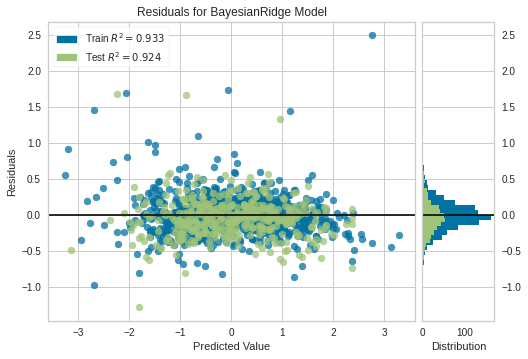

In [32]:
plot_model(br, plot = 'residuals')

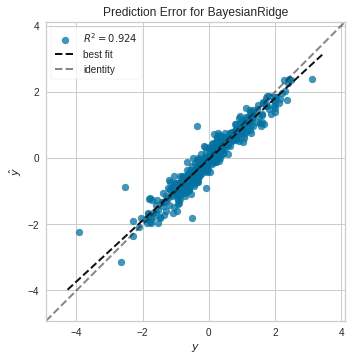

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [33]:
plot_model(br, plot = 'error')

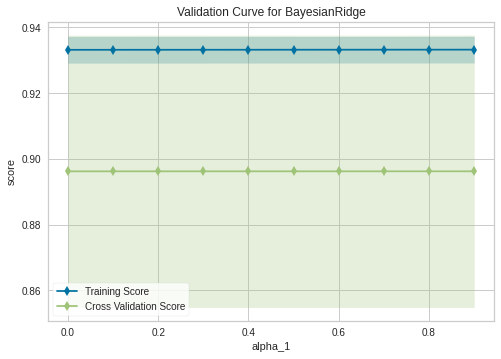

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [34]:
plot_model(br, plot = 'vc')

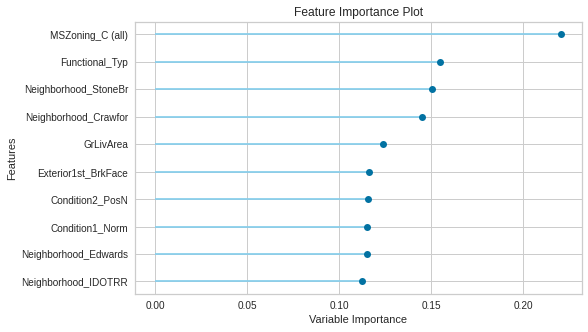

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [35]:
plot_model(br, plot = 'feature')

### **5-5. LightGBM 모델 해석하기**

**🥕 interpret_model( )**
- 모델을 해석
- 훈련된 모델 객체의 plot 유형을 문자열로 받음
- 해석은 SHAP 기반으로 구현됨
- 트리 기반 모델에서만 사용 가능함

※ pycaret.classification, pycaret.regression 모듈에서만 사용 가능  
※ SHAP: SHapley Addictive exPlanations

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=30,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.1,
              n_estimators=120, n_jobs=-1, num_leaves=90, objective=None,
              random_state=123, reg_alpha=0.5, reg_lambda=0.2, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


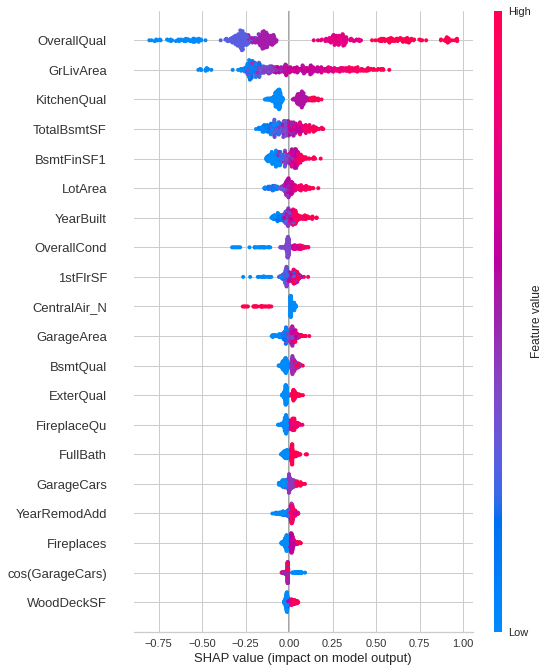

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [36]:
interpret_model(lightgbm)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=30,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.1,
              n_estimators=120, n_jobs=-1, num_leaves=90, objective=None,
              random_state=123, reg_alpha=0.5, reg_lambda=0.2, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), plot=correlation, feature=TotalBsmtSF, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: correlation
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


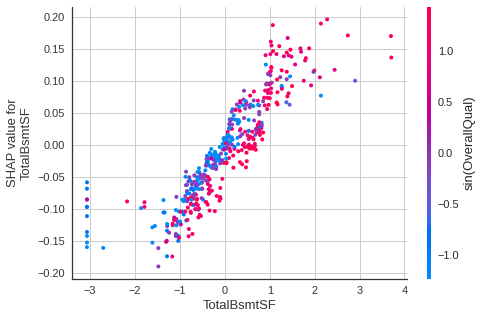

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [37]:
interpret_model(lightgbm, plot = 'correlation', feature = 'TotalBsmtSF')

In [38]:
interpret_model(lightgbm, plot = 'reason', observation = 0)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=30,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.1,
              n_estimators=120, n_jobs=-1, num_leaves=90, objective=None,
              random_state=123, reg_alpha=0.5, reg_lambda=0.2, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), plot=reason, feature=None, observation=0)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: reason
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


# **6. 혼합 마무리 & 테스트 데이터셋 예측**

In [39]:
# hold-out 상태에서 예측
predict_model(blend_all)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,13568.5491,4.508398e+08,21232.9878,0.9258,0.1067,0 0.07447 dtype: float64


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,0,Label
0,0.251360,-0.027987,0.677991,-0.453581,1.303979,1.147546,-0.779546,1.118168,-0.156813,0.593385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,204900.0,201842.8349
1,-1.305110,-0.230990,-0.785966,1.243813,-1.561192,-1.474096,-0.779546,-0.652716,-0.156813,-0.691326,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,116000.0,115222.3775
2,0.111495,2.296487,0.677991,0.497782,0.733018,0.280788,-0.779546,1.118168,-0.156813,0.593385,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,248000.0,262765.4589
3,-0.994191,0.061922,-1.590836,0.497782,-1.042062,-1.474096,-0.779546,-0.652716,-0.156813,-0.691326,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,113000.0,91296.5473
4,-0.411827,0.568432,-0.024834,-0.453581,-0.865468,-1.474096,1.260371,-0.652716,-0.156813,-0.691326,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,119200.0,121541.1384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,0.768863,0.064436,-0.024834,1.243813,-0.413418,0.094777,0.753084,-0.652716,-0.156813,0.593385,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,158000.0,168805.1556
430,0.251360,-0.089101,-0.024834,0.497782,-0.563351,-1.222026,1.304776,-0.652716,-0.156813,-0.691326,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,148000.0,135149.3978
431,1.850760,1.322863,-0.785966,0.497782,-0.563351,-1.222026,-0.779546,-0.652716,2.222482,-0.691326,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,170000.0,161901.4528
432,1.337798,0.405711,-0.024834,-0.453581,0.870392,0.548429,-0.779546,-0.652716,-0.156813,0.593385,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,181000.0,179407.0920


**🥕 홀드아웃(Holdout)**
- 주어진 원본 데이터를 랜덤하게 두 분류로 분리하여 교차 검증을 실시하는 방법
- 하나는 train data로, 하나는 test data로 사용

- RMSLE: hold-out = 0.1061 vs 10 fold CV = 0.1180

In [40]:
final_blender = finalize_model(blend_all)
print(final_blender)

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 20
INFO:logs:VotingRegressor(estimators=[('Huber Regressor_0',
                             HuberRegressor(alpha=0.4697, epsilon=1.35,
                                            fit_intercept=True, max_iter=100,
                                            tol=1e-05, warm_start=False)),
                            ('Orthogonal Matching Pursuit_1',
                             OrthogonalMatchingPursuit(fit_intercept=False,
                                                       n_nonzero_coefs=81,
                                                       normalize=False,
                                                       precompute='auto',
                                                       tol=None)),
                            ('Ridge_2',
                             Ridge(alpha=0.534, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=Tr

VotingRegressor(estimators=[('Huber Regressor_0',
                             HuberRegressor(alpha=0.4697, epsilon=1.35,
                                            fit_intercept=True, max_iter=100,
                                            tol=1e-05, warm_start=False)),
                            ('Orthogonal Matching Pursuit_1',
                             OrthogonalMatchingPursuit(fit_intercept=False,
                                                       n_nonzero_coefs=81,
                                                       normalize=False,
                                                       precompute='auto',
                                                       tol=None)),
                            ('Ridge_2',
                             Ridge(alpha=0.534, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=True,
                                   random_state=123, solver='auto',
                                   tol=0.001

In [41]:
predictions = predict_model(final_blender, data = test)
predictions.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,122541.6073
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,161290.9240
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,186873.6974
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,200919.4502
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,196991.2466
